# Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
from statistics import mode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV


# Loading of Data

In [2]:
df_train = pd.read_csv(r"D:\MY DATA\PYTHON DATA SCIENCE\Projects\Job-A-Thon(Health Insurance Prediction)\train_Df64byy.csv")
df_test = pd.read_csv(r"D:\MY DATA\PYTHON DATA SCIENCE\Projects\Job-A-Thon(Health Insurance Prediction)\test_YCcRUnU.csv")

In [3]:
print(df_train.shape,'\n')
print(df_test.shape)

(50882, 14) 

(21805, 13)


In [4]:
df_train.info

<bound method DataFrame.info of           ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  \
0          1        C3         3213            Rented          Individual   
1          2        C5         1117             Owned               Joint   
2          3        C5         3732             Owned          Individual   
3          4       C24         4378             Owned               Joint   
4          5        C8         2190            Rented          Individual   
...      ...       ...          ...               ...                 ...   
50877  50878        C4          845            Rented          Individual   
50878  50879        C5         4188            Rented          Individual   
50879  50880        C1          442            Rented          Individual   
50880  50881        C1            4             Owned               Joint   
50881  50882        C3         3866            Rented          Individual   

       Upper_Age  Lower_Age Is_Spouse Healt

In [5]:
df_test.info

<bound method DataFrame.info of           ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  \
0      50883        C1          156             Owned          Individual   
1      50884        C4            7             Owned               Joint   
2      50885        C1          564            Rented          Individual   
3      50886        C3         1177            Rented          Individual   
4      50887        C1          951             Owned          Individual   
...      ...       ...          ...               ...                 ...   
21800  72683        C3         1044             Owned          Individual   
21801  72684        C4          266             Owned          Individual   
21802  72685       C12         2470             Owned          Individual   
21803  72686       C10         1676            Rented          Individual   
21804  72687        C2         3617             Owned          Individual   

       Upper_Age  Lower_Age Is_Spouse Healt

In [6]:
df_train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [7]:
df_test.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,21805.000000,21805.000000,21805.000000,21805.000000,13202.000000,21805.000000,21805.000000
mean,61785.000000,1748.737491,44.877734,42.748085,2.440085,15.138363,14220.306581
std,6294.705646,1438.358949,17.254898,17.269112,1.037627,6.302805,6497.996164
min,50883.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2152.000000
25%,56334.000000,535.000000,28.000000,27.000000,1.000000,12.000000,9285.000000
50%,61785.000000,1392.000000,44.000000,41.000000,3.000000,17.000000,13244.000000
75%,67236.000000,2712.000000,59.000000,57.000000,3.000000,20.000000,18201.600000
max,72687.000000,6185.000000,75.000000,75.000000,4.000000,22.000000,43776.000000


In [8]:
print(df_train.head())

   ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0   1        C3         3213            Rented          Individual         36   
1   2        C5         1117             Owned               Joint         75   
2   3        C5         3732             Owned          Individual         32   
3   4       C24         4378             Owned               Joint         52   
4   5        C8         2190            Rented          Individual         44   

   Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         36        No               X1                     14+   
1         22        No               X2                     NaN   
2         32        No              NaN                     1.0   
3         48        No               X1                     14+   
4         44        No               X2                     3.0   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  Response  
0                  3.0               

In [9]:
print(df_test.head())

      ID City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  \
0  50883        C1          156             Owned          Individual   
1  50884        C4            7             Owned               Joint   
2  50885        C1          564            Rented          Individual   
3  50886        C3         1177            Rented          Individual   
4  50887        C1          951             Owned          Individual   

   Upper_Age  Lower_Age Is_Spouse Health Indicator Holding_Policy_Duration  \
0         30         30        No              NaN                     6.0   
1         69         68       Yes               X1                     3.0   
2         28         28        No               X3                     2.0   
3         23         23        No               X3                     3.0   
4         75         75        No               X3                     NaN   

   Holding_Policy_Type  Reco_Policy_Cat  Reco_Policy_Premium  
0                  3.0       

In [10]:
#Samples of train and test data
print('The number of samples into the train data is {}.'.format(df_train.shape[0]))
print('The number of samples into the test data is {}.'.format(df_test.shape[0]))

The number of samples into the train data is 50882.
The number of samples into the test data is 21805.


In [11]:
# Set target value
target='Response'

In [12]:
#remove 'ID' column from train data
df_train.drop(['ID'], inplace=True, axis=1)

In [13]:
#check for duplicates if any
print(df_train.shape)
df_train.drop_duplicates(inplace=True)
print(df_train.shape)

(50882, 13)
(50882, 13)


# Find missing values

In [14]:
df_train.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [15]:
df_test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [16]:
df_train.rename(columns = {'Health Indicator': "Health_Indicator"}, inplace = True)
df_test.rename(columns = {'Health Indicator': "Health_Indicator"}, inplace = True)

In [17]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print(df_train[numerical_feats].columns,'\n')
categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print(df_train[categorical_feats].columns)

Index(['Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object') 

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health_Indicator', 'Holding_Policy_Duration'],
      dtype='object')


In [18]:
df_train.Health_Indicator.value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health_Indicator, dtype: int64

In [19]:
df_test.Health_Indicator.value_counts()

X1    5614
X2    4516
X3    2846
X4    2442
X5     681
X6     514
X7      96
X8      41
X9      28
Name: Health_Indicator, dtype: int64

In [20]:
df_train.Holding_Policy_Duration.value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [21]:
df_test.Holding_Policy_Duration.value_counts()

14+     1892
1.0     1891
2.0     1772
3.0     1606
4.0     1205
5.0      992
6.0      903
7.0      664
8.0      569
9.0      493
10.0     333
11.0     254
13.0     221
14.0     211
12.0     196
Name: Holding_Policy_Duration, dtype: int64

In [22]:
print('The mode of Health_Indicator for df_train', df_train["Health_Indicator"].mode())
print('The mode of Health_Indicator for df_test',df_test["Health_Indicator"].mode())

The mode of Health_Indicator for df_train 0    X1
dtype: object
The mode of Health_Indicator for df_test 0    X1
dtype: object


In [23]:
print('The mode of Holding_Policy_Duration for df_train', df_train["Holding_Policy_Duration"].mode())
print('The mode of Holding_Policy_Duration for df_test',df_test["Holding_Policy_Duration"].mode())

The mode of Holding_Policy_Duration for df_train 0    1.0
dtype: object
The mode of Holding_Policy_Duration for df_test 0    14+
dtype: object


[Text(0.5, 0, 'Holding_Policy_Type')]

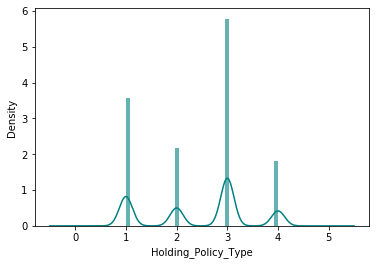

In [24]:
ax = df_train["Holding_Policy_Type"].hist(bins=40, density=True, stacked=True, color='teal', alpha=0.6)
df_train["Holding_Policy_Type"].plot(kind='density', color='teal')
ax.set(xlabel='Holding_Policy_Type')

In [25]:
print('The median of "Holding_Policy_Type for df_train" is %.2f' %(df_train["Holding_Policy_Type"].mean()))
print('The median of "Holding_Policy_Type for df_test" is %.2f' %(df_test["Holding_Policy_Type"].mean()))

The median of "Holding_Policy_Type for df_train" is 2.44
The median of "Holding_Policy_Type for df_test" is 2.44


# Fill missing values

In [26]:
df_train["Health_Indicator"].fillna(mode(df_train["Health_Indicator"]), inplace=True)
df_test["Health_Indicator"].fillna(mode(df_test["Health_Indicator"]), inplace=True)

In [27]:
df_train["Holding_Policy_Duration"].fillna(df_train["Holding_Policy_Type"].median(skipna=True), inplace=True)
df_test["Holding_Policy_Duration"].fillna(df_test["Holding_Policy_Type"].median(skipna=True), inplace=True)

In [28]:
df_train["Holding_Policy_Type"].fillna(df_train["Holding_Policy_Type"].median(skipna=True), inplace=True)
df_test["Holding_Policy_Type"].fillna(df_test["Holding_Policy_Type"].median(skipna=True), inplace=True)

In [29]:
df_train.isnull().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health_Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [30]:
df_test.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health_Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

# Exploratory Data Analysis(EDA)

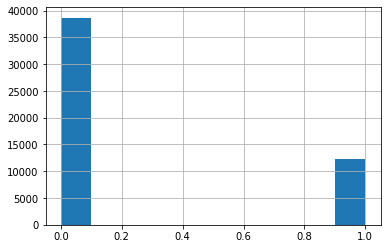

In [31]:
# check target feature distribution
df_train[target].hist()
plt.show()

In [32]:
#Find numerical and categorical features
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print(df_train[numerical_feats].columns,'\n')
print(df_train[categorical_feats].columns)

Index(['Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object') 

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health_Indicator', 'Holding_Policy_Duration'],
      dtype='object')


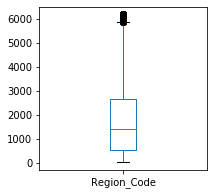

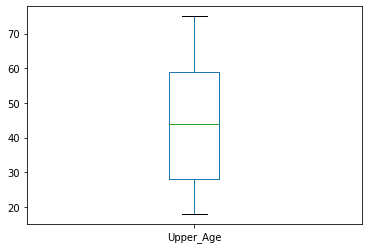

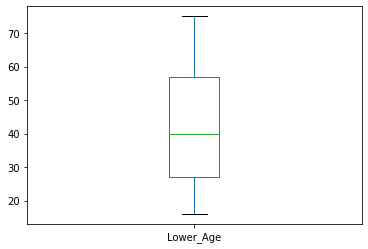

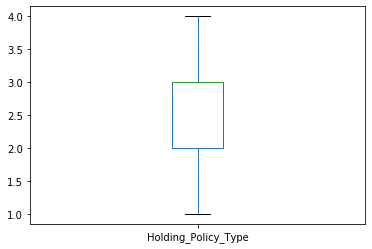

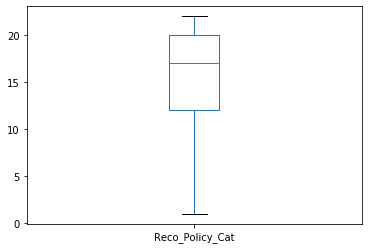

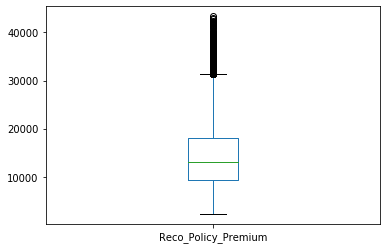

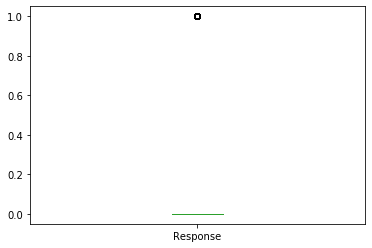

In [33]:
#Outlier detection
fig = plt.figure(figsize=(3,3))
for num in numerical_feats:
    box = df_train[num].plot(kind='box')
    plt.show()

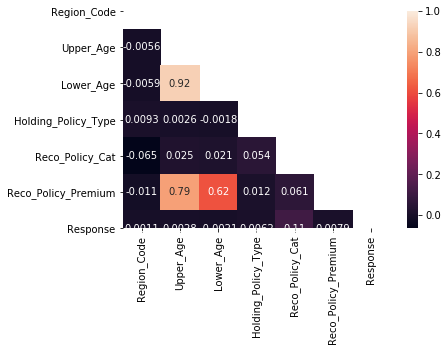

In [34]:
# correlation heatmap for all features
corr = df_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot=True)
plt.show()

In [35]:
#Skewness and Kurtosis
for col in numerical_feats:
    print('{:22}'.format(col),  
          'Skewness: {:05.2f}'.format(df_train[col].skew()), 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df_train[col].kurt())  
         )

Region_Code            Skewness: 00.80     Kurtosis: -00.20
Upper_Age              Skewness: 00.22     Kurtosis: -01.23
Lower_Age              Skewness: 00.33     Kurtosis: -01.17
Holding_Policy_Type    Skewness: -0.91     Kurtosis: 000.02
Reco_Policy_Cat        Skewness: -0.93     Kurtosis: -00.31
Reco_Policy_Premium    Skewness: 00.78     Kurtosis: 000.42
Response               Skewness: 01.22     Kurtosis: -00.52


In [36]:
#Description of each variable
for i in df_train:
    print(df_train[i].describe())
    print('\n')

count     50882
unique       36
top          C1
freq       8973
Name: City_Code, dtype: object


count    50882.000000
mean      1732.788707
std       1424.081652
min          1.000000
25%        523.000000
50%       1391.000000
75%       2667.000000
max       6194.000000
Name: Region_Code, dtype: float64


count     50882
unique        2
top       Owned
freq      27951
Name: Accomodation_Type, dtype: object


count          50882
unique             2
top       Individual
freq           40536
Name: Reco_Insurance_Type, dtype: object


count    50882.000000
mean        44.856275
std         17.310271
min         18.000000
25%         28.000000
50%         44.000000
75%         59.000000
max         75.000000
Name: Upper_Age, dtype: float64


count    50882.000000
mean        42.738866
std         17.319375
min         16.000000
25%         27.000000
50%         40.000000
75%         57.000000
max         75.000000
Name: Lower_Age, dtype: float64


count     50882
unique        2
top    

# Encoding of categorical data

In [37]:
categorical_feats

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health_Indicator', 'Holding_Policy_Duration'],
      dtype='object')

1) Encoding of train dataset

In [38]:
df_train['Holding_Policy_Duration'] = pd.to_numeric(df_train['Holding_Policy_Duration'].map(lambda x:'15' if x == '14+' else x))

In [39]:
#Label Encoding
label_encoder = LabelEncoder()
for i in df_train[categorical_feats].columns:
    df_train[i] = label_encoder.fit_transform(df_train[i])

In [40]:
df_train['City_Code'].unique()

array([22, 31, 16, 34, 35,  0,  6, 20, 19, 33, 12, 17, 30, 11, 27,  1,  8,
        9,  7, 21, 26, 18, 10, 32,  3,  4,  2,  5, 14, 15, 13, 29, 25, 23,
       28, 24], dtype=int64)

In [41]:
df_train['Health_Indicator'].unique()

array([0, 1, 3, 2, 5, 4, 7, 6, 8], dtype=int64)

In [42]:
city_code = pd.get_dummies(df_train['City_Code'], prefix = 'City_Code')
df_train = df_train.join(city_code)
del df_train['City_Code']

In [43]:
health_indicator = pd.get_dummies(df_train['Health_Indicator'], prefix = 'Health_Indicator')
df_train = df_train.join(health_indicator)
del df_train['Health_Indicator']

In [44]:
df_train

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,...,City_Code_35,Health_Indicator_0,Health_Indicator_1,Health_Indicator_2,Health_Indicator_3,Health_Indicator_4,Health_Indicator_5,Health_Indicator_6,Health_Indicator_7,Health_Indicator_8
0,3213,1,0,36,36,0,14,3.0,22,11628.0,...,0,1,0,0,0,0,0,0,0,0
1,1117,0,1,75,22,0,2,3.0,22,30510.0,...,0,0,1,0,0,0,0,0,0,0
2,3732,0,0,32,32,0,0,1.0,19,7450.0,...,0,1,0,0,0,0,0,0,0,0
3,4378,0,1,52,48,0,14,3.0,19,17780.0,...,0,1,0,0,0,0,0,0,0,0
4,2190,1,0,44,44,0,2,1.0,16,10404.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,845,1,0,22,22,0,2,3.0,18,7704.0,...,0,0,0,1,0,0,0,0,0,0
50878,4188,1,0,27,27,0,6,3.0,4,5408.0,...,0,0,0,1,0,0,0,0,0,0
50879,442,1,0,63,63,0,14,1.0,12,11374.0,...,0,0,1,0,0,0,0,0,0,0
50880,4,0,1,71,49,0,1,2.0,16,28179.2,...,0,0,1,0,0,0,0,0,0,0


2) Encoding of test dataset

In [45]:
numerical_feats = df_test.dtypes[df_test.dtypes != "object"].index
categorical_feats = df_test.dtypes[df_test.dtypes == "object"].index

In [46]:
df_test['Holding_Policy_Duration'] = pd.to_numeric(df_test['Holding_Policy_Duration'].map(lambda x:'15' if x == '14+' else x))

In [47]:
#Label Encoding
label_encoder = LabelEncoder()
for i in df_test[categorical_feats].columns:
    df_test[i] = label_encoder.fit_transform(df_test[i])

In [48]:
city_code = pd.get_dummies(df_test['City_Code'], prefix = 'City_Code')
df_test = df_test.join(city_code)
del df_test['City_Code']

In [49]:
health_indicator = pd.get_dummies(df_test['Health_Indicator'], prefix = 'Health_Indicator')
df_test = df_test.join(health_indicator)
del df_test['Health_Indicator']

In [50]:
df_test

,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,...,City_Code_35,Health_Indicator_0,Health_Indicator_1,Health_Indicator_2,Health_Indicator_3,Health_Indicator_4,Health_Indicator_5,Health_Indicator_6,Health_Indicator_7,Health_Indicator_8
0,50883,156,0,0,30,30,0,5,3.0,5,...,0,1,0,0,0,0,0,0,0,0
1,50884,7,0,1,69,68,1,2,3.0,18,...,0,1,0,0,0,0,0,0,0,0
2,50885,564,1,0,28,28,0,1,4.0,17,...,0,0,0,1,0,0,0,0,0,0
3,50886,1177,1,0,23,23,0,2,3.0,18,...,0,0,0,1,0,0,0,0,0,0
4,50887,951,0,0,75,75,0,2,3.0,5,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,1044,0,0,45,45,0,3,1.0,18,...,0,1,0,0,0,0,0,0,0,0
21801,72684,266,0,0,59,59,0,5,3.0,18,...,0,0,0,0,0,1,0,0,0,0
21802,72685,2470,0,0,74,74,0,2,3.0,1,...,0,0,0,1,0,0,0,0,0,0
21803,72686,1676,1,0,25,25,0,2,1.0,19,...,0,0,0,0,1,0,0,0,0,0


# Training of model

In [51]:
df = df_train.sample(frac=1, random_state=2).reset_index(drop=True)

X = df
y = df.pop(target)

# split into train dev and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2)
print(f"Train set has {X_train.shape[0]} records out of {len(df)} which is {round(X_train.shape[0]/len(df)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df)} which is {round(X_test.shape[0]/len(df)*100)}%")

Train set has 40705 records out of 50882 which is 80%
Test set has 10177 records out of 50882 which is 20%


# Feature scaling

In [52]:
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

1) Logistic Regression 

In [53]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scale, y_train)
y_pred = logreg.predict(X_test_scale)
Logistic_Regression = ("Accuracy:",accuracy_score(y_test, y_pred))
print(Logistic_Regression)

('Accuracy:', 0.7605384690969834)


2) K-Nearest Neighbour(KNN) Classifier

In [54]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train_scale, y_train)
y_pred = knn.predict(X_test_scale)
KNN = ("Accuracy:",accuracy_score(y_test, y_pred))
print(KNN)

('Accuracy:', 0.7124889456617863)


3) Support Vector Machine(SVM)

In [55]:
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train_scale, y_train)
y_pred = svc_lin.predict(X_test_scale)
SVM = ("Accuracy:",(accuracy_score(y_test, y_pred)))
print(SVM)

('Accuracy:', 0.7605384690969834)


4) Gausiian Naive Bayes

In [56]:
gauss = GaussianNB()
gauss.fit(X_train_scale, y_train)
y_pred = gauss.predict(X_test_scale)
GNB = ("Accuracy:",accuracy_score(y_test, y_pred))
print(GNB)

('Accuracy:', 0.7098359044905178)


5) Decision Tree

In [57]:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train_scale, y_train)
y_pred = tree.predict(X_test_scale)
Decision_Tree = ("Accuracy:",accuracy_score(y_test, y_pred))
print(Decision_Tree)

('Accuracy:', 0.6715141986833055)


6) Random Forest

In [58]:
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train_scale, y_train)
y_pred = forest.predict(X_test_scale)
Random_Forest = ("Accuracy:",accuracy_score(y_test, y_pred))
print(Random_Forest)

('Accuracy:', 0.7426550063869509)


7) Bagging Classifier

In [59]:
bagging = BaggingClassifier(n_estimators=100, max_features=10, max_samples=100, random_state=1, n_jobs=5)
bagging.fit(X_train_scale, y_train)
y_pred = bagging.predict(X_test_scale)
Bagging_Classifier = ("Accuracy:",accuracy_score(y_test, y_pred))
print(Bagging_Classifier)

('Accuracy:', 0.7605384690969834)


8) Adaboost

In [60]:
adaboost_model = AdaBoostClassifier(random_state=1)
adaboost_model.fit(X_train_scale, y_train)
y_pred = adaboost_model.predict(X_test_scale)
Adaboost_Classifier = ("Accuracy:",accuracy_score(y_test, y_pred))
print(Adaboost_Classifier)

('Accuracy:', 0.7606367298811044)


9) Gradient Boosting

In [61]:
gradient_boosting = GradientBoostingClassifier(loss='deviance', random_state=2, verbose=0,
                                    n_estimators=50, max_depth=7,
                                    min_samples_leaf=1, min_samples_split=8)
gradient_boosting.fit(X_train_scale, y_train)
y_pred = gradient_boosting.predict(X_test_scale)
Gradient_Boosting = ("Accuracy:",accuracy_score(y_test, y_pred))
print(Gradient_Boosting)

<IPython.core.display.Javascript object>

('Accuracy:', 0.7605384690969834)


# All Model Accuracy

In [62]:

#Logistic Regression
print("Logistic Regression:", Logistic_Regression)
print()

#KNN Classifier
print("KNN:",KNN)
print()

#SVM
print('SVM:', SVM)
print()

#GNB
print("GNB:", GNB)
print()

#Decision Tree
print("Decision Tree:", Decision_Tree)
print()

#Random Forest
print("Random Forest:", Random_Forest)
print()

#Bagging Classifier
print("Bagging Classifier:", Bagging_Classifier)
print()

#Random Forest
print("Adaboost:", Adaboost_Classifier)
print()

#Random Forest
print("GradientBoosting:", Gradient_Boosting)
print()


Logistic Regression: ('Accuracy:', 0.7605384690969834)

KNN: ('Accuracy:', 0.7124889456617863)

SVM: ('Accuracy:', 0.7605384690969834)

GNB: ('Accuracy:', 0.7098359044905178)

Decision Tree: ('Accuracy:', 0.6715141986833055)

Random Forest: ('Accuracy:', 0.7426550063869509)

Bagging Classifier: ('Accuracy:', 0.7605384690969834)

Adaboost: ('Accuracy:', 0.7606367298811044)

GradientBoosting: ('Accuracy:', 0.7605384690969834)



It seems that 'SVM Classifier' has the best accuracy score. So I am going to use this model on submission.csv

# Submitting Solution

In [63]:
df_train_conv = sc.fit_transform(df_train.drop(['Response'], axis = 1))
df_test_conv = df_test.drop(['ID'],axis = 1)

In [64]:
svcclf = SVC(gamma=50)
SVC_fit = svcclf.fit(df_train_conv, df_train['Response'])

In [65]:
df_test['Response'] = svcclf.predict(df_test_conv)

In [66]:
submission = df_test[['ID', 'Response']]

In [67]:
submission.to_csv('Job_A-Thon Final Submission.csv', index = False)